In [1]:
from config import *

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Microsoft YaHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
import seaborn as sns
import scipy.stats as stats
import numpy as np

%matplotlib inline

In [3]:
print(f'{year}年{month}月')

2020年12月


In [4]:
import pandas as pd
pd.set_option('display.max_rows', 200)
import matplotlib.pyplot as plt
import sys
sys.path.append('../../py')
import db

In [5]:
conn=db.get_conn()

In [6]:
stat_data = pd.read_sql(sql='select * from general_stats order by year_month', con=conn)
stat_data

,year_month,salary_mean,salary_median,jd_count,head_count
0,202001,13800,12500,84978,271479
1,202002,14379,12500,79887,247850
2,202003,14514,12500,74063,228240
3,202004,14506,12500,97825,295541
4,202005,14488,12500,102002,309115
5,202006,14370,12500,103149,310619
6,202007,14415,12500,96986,288685
7,202008,14401,12500,117866,346036
8,202009,14469,12500,119174,352733
9,202010,14539,12500,121199,358539


In [7]:
stat_data['year_month'] = stat_data['year_month'] - 202000

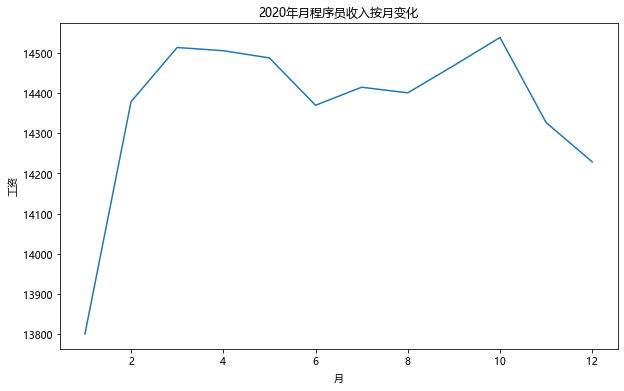

In [8]:
plt.figure(figsize=(10,6))
plt.plot("year_month","salary_mean",data=stat_data)
plt.title(f"{year}年月程序员收入按月变化")
plt.xlabel("月")
plt.ylabel("工资")
plt.show()

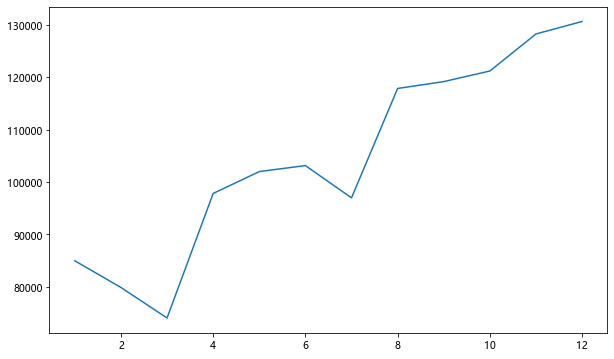

In [9]:
plt.figure(figsize=(10,6))
plt.plot("year_month","jd_count",data=stat_data)
plt.show()

# 按照职能统计平均工资

In [10]:
data_original=pd.read_sql(sql=f"select * from jobs where year_month={year}{month:02} and monthly_salary>0 and monthly_salary<100000", con=db.get_conn())

data_career=data_original.groupby(by='career').agg(
    salary=pd.NamedAgg(column='monthly_salary', aggfunc='mean')
)

data_career['salary']=data_career['salary'].astype(int)

data_career[f'2020年{month}月']=data_career['salary']
del data_career['salary']

Text(0.5, 1.0, '工资人数分布')

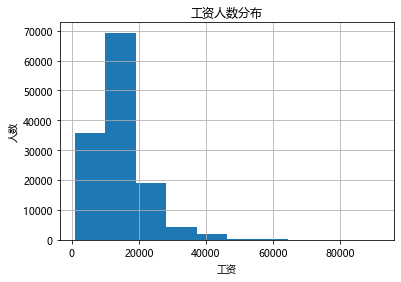

In [11]:
data_original['monthly_salary'].hist()
plt.xlabel("工资")
plt.ylabel("人数")
plt.title("工资人数分布")

In [12]:
data_original2019=pd.read_sql(sql=f"select * from jobs where year_month={year}{3:02} and monthly_salary>0 and monthly_salary<100000", con=db.get_conn())

data_career2019=data_original2019.groupby(by='career').agg(
    salary=pd.NamedAgg(column='monthly_salary', aggfunc='mean')
)

data_career2019[f'{year}年{1}月']=data_career2019['salary'].astype(int)
del data_career2019['salary']

In [13]:
data_career2019.join(data_career, how='outer')

,2020年1月,2020年12月
career,,
.NET开发工程师,NaN,11842.0
ADAS,20092.0,NaN
Android开发工程师,13487.0,14902.0
BI工程师,NaN,13755.0
CAE,16263.0,NaN
CTO,41491.0,NaN
Cocos2d-x开发工程师,16572.0,16924.0
C开发工程师,NaN,15794.0
DSP,17554.0,NaN


In [14]:
data_original2019

,job_id,year_month,monthly_salary,headcount,title,page_title,zhinengleibie,career,city,province,...,bd_storm,bd_pig,bd_mahout,bd_impala,bd_yarn,bd_alluxio,bd_flink,bd_presto,bd_heron,salary_string
0,100004606,202003,14000,5,Linux C/C++ 高级研发工程师,【上海-浦东新区Linux C/C++ 高级研发工程师_Linux C/C++ 高级研发工程...,软件工程师,软件工程师,上海,上海,...,False,False,False,False,False,False,False,False,False,None
1,100007823,202003,12500,5,ABAP开发 工程师,【深圳-宝安区ABAP开发 工程师_ABAP开发 工程师招聘_深圳市合元科技有限公司】-前程...,软件工程师,软件工程师,深圳,广东,...,False,False,False,False,False,False,False,False,False,None
2,100008460,202003,15000,12,java高级工程师(YC) (职位编号：YC001),【南京-江宁区java高级工程师(YC)_java高级工程师(YC)招聘_南京新联软件有限责...,软件工程师,软件工程师,南京,江苏,...,False,False,False,False,False,False,False,False,False,None
3,100011882,202003,11000,1,Java开发工程师,【北京Java开发工程师_Java开发工程师招聘_上海英方软件股份有限公司】-前程无忧官方招聘网站,软件工程师,软件工程师,北京,北京,...,False,False,False,False,False,False,False,False,False,None
4,100015281,202003,12500,3,Nodejs开发工程师,【大连Nodejs开发工程师_Nodejs开发工程师招聘_英诺瑞新科技发展（大连）有限公司】...,软件工程师,软件工程师,大连,辽宁,...,False,False,False,False,False,False,False,False,False,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73673,99997289,202003,17500,5,算法工程师,【杭州算法工程师_算法工程师招聘_杭州诚智天扬科技有限公司】-前程无忧官方招聘网站,算法工程师,算法工程师,杭州,浙江,...,False,False,False,False,False,False,False,False,False,None
73674,99997652,202003,13000,2,Android开发工程师,【深圳-宝安区Android开发工程师_Android开发工程师招聘_深圳市发掘科技有限公司...,软件工程师,Android开发工程师,深圳,广东,...,False,False,False,False,False,False,False,False,False,None
73675,99998962,202003,12500,3,java开发工程师,【成都-武侯区java开发工程师_java开发工程师招聘_广州思迈特软件有限公司】-前程无忧...,软件工程师,软件工程师,成都,四川,...,False,False,False,False,False,False,False,False,False,None
73676,99999731,202003,12500,1,Labview工程师,【苏州-吴中区Labview工程师_Labview工程师招聘_苏州固特伟自动化系统设备有限公...,软件工程师,软件工程师,苏州,江苏,...,False,False,False,False,False,False,False,False,False,None


In [15]:
salary=data_original.monthly_salary.values

In [16]:
salary.sort()

In [17]:
data_original[data_original['monthly_salary'].isna()]

,job_id,year_month,monthly_salary,headcount,title,page_title,zhinengleibie,career,city,province,...,bd_storm,bd_pig,bd_mahout,bd_impala,bd_yarn,bd_alluxio,bd_flink,bd_presto,bd_heron,salary_string


In [18]:
import numpy as np

In [19]:
def lorenz_curve(X):
    X_lorenz = X.cumsum() / X.sum()
    X_lorenz = np.insert(X_lorenz, 0, 0) 
    X_lorenz[0], X_lorenz[-1]
    fig, ax = plt.subplots(figsize=[6,6])
    ## scatter plot of Lorenz curve
    ax.scatter(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz, 
               color='darkgreen', s=1)
    ## line plot of equality
    ax.plot([0,1], [0,1], color='k')
    ax.set_xlabel("累计人群")
    ax.set_ylabel("累计收入")
    ax.set_title("洛伦茨曲线")

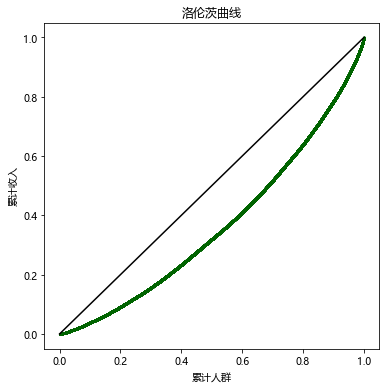

In [20]:
lorenz_curve(salary)

In [21]:
def gini(arr):
    ## first sort
    sorted_arr = arr.copy()
    sorted_arr.sort()
    n = arr.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
    return coef_*weighted_sum/(sorted_arr.sum()) - const_


In [22]:
gini(salary)

0.2668711117484024

In [23]:
len(salary)

130688

0.24115160414799508

None

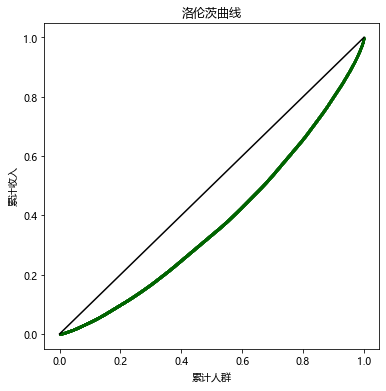

In [24]:
city_salary=data_original.loc[data_original['city']=='北京'].monthly_salary.values
display(gini(city_salary))
display(lorenz_curve(city_salary))

0.2709379677369086

None

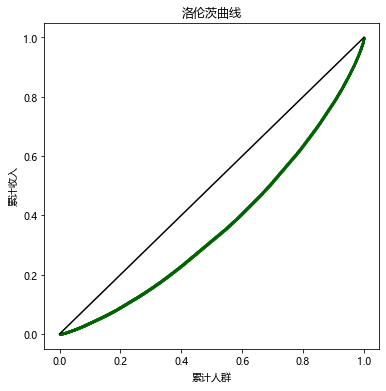

In [25]:
city_salary=data_original.loc[data_original['city']=='杭州'].monthly_salary.values
display(gini(city_salary))
display(lorenz_curve(city_salary))